# Machine Learning II

## Laboratorio práctico de Regresión Lineal

### 1. Relacionando pesos y estaturas 

Vamos a trabajar con un dataset ficticio que sólo relaciona dos variables entre sí: pesos y estaturas.



### Instrucciones

* Descargar archivo excel de pesos y estaturas
* Graficar en el plano las observaciones. Plantear una hipótesis de acuerdo a lo que observa
* Generar los conjuntos de entrenamiento y validación
* Escalar las variables
* Ajustar a través de un modelo de regresión lineal usando la librería sklearn
* Calcular MSE y MAE en el conjunto de validación
* ¿Está sobreajustado el modelo?
* Graficar la recta ajustada junto a los puntos. Adornar la grafica indicando leyenda.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('pesos_estaturas.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   #         30 non-null     int64  
 1   nombre    30 non-null     object 
 2   peso      30 non-null     int64  
 3   estatura  30 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.1+ KB


In [3]:
df.head()

,#,nombre,peso,estatura
0,1,Juan,102,1.98
1,2,Carlos,65,1.57
2,3,Felipe,75,1.94
3,4,Anibal,92,1.61
4,5,Alberto,54,1.49


<AxesSubplot:xlabel='estatura', ylabel='peso'>

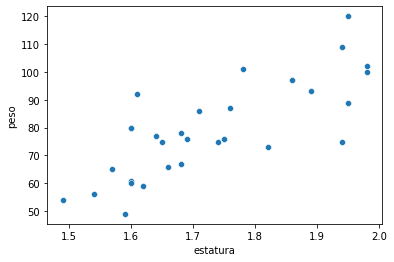

In [4]:
sns.scatterplot(x = df.estatura, y = df.peso)

In [5]:
df.estatura

0     1.98
1     1.57
2     1.94
3     1.61
4     1.49
5     1.62
6     1.60
7     1.68
8     1.95
9     1.68
10    1.60
11    1.82
12    1.94
13    1.89
14    1.74
15    1.60
16    1.60
17    1.54
18    1.59
19    1.78
20    1.95
21    1.75
22    1.71
23    1.65
24    1.64
25    1.69
26    1.86
27    1.66
28    1.98
29    1.76
Name: estatura, dtype: float64

In [6]:
df.peso

0     102
1      65
2      75
3      92
4      54
5      59
6      61
7      67
8      89
9      78
10     80
11     73
12    109
13     93
14     75
15     60
16     80
17     56
18     49
19    101
20    120
21     76
22     86
23     75
24     77
25     76
26     97
27     66
28    100
29     87
Name: peso, dtype: int64

**Hipótesis a partir de la observación:** Existe una relación creciente entre la estatura y el peso. Es decir, a mayor estatura tiene una persona, entonces tiene más peso

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.estatura, df.peso, test_size = 0.2)

In [13]:
X_train

16    1.60
13    1.89
7     1.68
3     1.61
0     1.98
9     1.68
8     1.95
14    1.74
15    1.60
28    1.98
24    1.64
19    1.78
1     1.57
22    1.71
29    1.76
26    1.86
4     1.49
11    1.82
25    1.69
23    1.65
10    1.60
12    1.94
5     1.62
18    1.59
Name: estatura, dtype: float64

In [14]:
X_test

2     1.94
17    1.54
20    1.95
21    1.75
27    1.66
6     1.60
Name: estatura, dtype: float64

In [15]:
y_train

16     80
13     93
7      67
3      92
0     102
9      78
8      89
14     75
15     60
28    100
24     77
19    101
1      65
22     86
29     87
26     97
4      54
11     73
25     76
23     75
10     80
12    109
5      59
18     49
Name: peso, dtype: int64

In [16]:
y_test

2      75
17     56
20    120
21     76
27     66
6      61
Name: peso, dtype: int64

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# se escala r/ solo al conjunto de entrenamientol, previniendo el filtrado del test hacia training
scaler.fit(np.array(X_train).reshape(-1, 1))


# ver https://stackoverflow.com/questions/51150153/valueerror-expected-2d-array-got-1d-array-instead ,
# segunda respeusta (con dibujos) para entender el reshape

X_train = scaler.transform(np.array(X_train).reshape(-1, 1))
X_test  = scaler.transform(np.array(X_test).reshape(-1, 1))

# debemos pasar a numpy.array ya que los debe leer como arreglos para hacer la transformacion
# esta complicacion se da principalmente cuando estamos contrastado una variable versus una variable, tal como dicen en el link

In [24]:
X_train

array([[0.2244898 ],
       [0.81632653],
       [0.3877551 ],
       [0.24489796],
       [1.        ],
       [0.3877551 ],
       [0.93877551],
       [0.51020408],
       [0.2244898 ],
       [1.        ],
       [0.30612245],
       [0.59183673],
       [0.16326531],
       [0.44897959],
       [0.55102041],
       [0.75510204],
       [0.        ],
       [0.67346939],
       [0.40816327],
       [0.32653061],
       [0.2244898 ],
       [0.91836735],
       [0.26530612],
       [0.20408163]])

In [25]:
X_test

array([[0.91836735],
       [0.10204082],
       [0.93877551],
       [0.53061224],
       [0.34693878],
       [0.2244898 ]])

In [26]:
from sklearn.linear_model import LinearRegression

# llamamos la instancia
reg = LinearRegression()

# hacemos el ajuste
reg.fit(X_train, y_train)

LinearRegression()

In [27]:
#obtenemos el intercepto
print(reg.intercept_)

59.49565056450122


In [ ]:
#obtenemos el coeficiente(pendiente)
print(reg.coef_)

[42.87321858]


In [30]:
X_test

array([[0.91836735],
       [0.10204082],
       [0.93877551],
       [0.53061224],
       [0.34693878],
       [0.2244898 ]])

In [29]:
# Generamos la prediccion sobre el test

reg.predict(X_test)

array([98.86901457, 63.87046879, 99.74397821, 82.24470532, 74.37003252,
       69.12025065])

In [31]:
y_test

2      75
17     56
20    120
21     76
27     66
6      61
Name: peso, dtype: int64

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# calculamos el MSE
mean_squared_error(reg.predict(X_test),y_test)

202.82880228389854

In [33]:
202.82880228389854**0.5

14.24179771952609

In [34]:
# recordar que la escala de este error esta al cuadrado, asi q debemos sacar raiz cuadrada

MSE = np.sqrt(mean_squared_error(reg.predict(X_test),y_test))

In [35]:
MSE

14.24179771952609

In [36]:
# calculamos el MAE
MAE = mean_absolute_error(reg.predict(X_test),y_test)
MAE

12.455082273516481

**Dio mejor el MAE, asi que nos quedamos con este**

In [37]:
# veamos como anda el MAE en el conjunto test

MAE_training = mean_absolute_error(reg.predict(X_train),y_train)
MAE_training

7.838059543639779

In [38]:
diferencia = MAE_training - MAE
diferencia

-4.617022729876703

In [39]:
MSE_training = np.sqrt(mean_squared_error(reg.predict(X_train),y_train))

In [40]:
MSE_training-MSE

-4.422500779084151

Text(0, 0.5, 'peso [kg]')

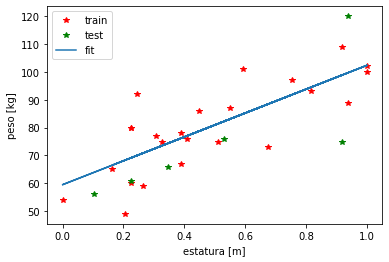

In [41]:
plt.plot(X_train, y_train, 'r*',label='train')
plt.plot(X_test, y_test, 'g*',label='test')
plt.plot(X_train,[reg.intercept_+reg.coef_*x for x in X_train], label='fit')
plt.legend()
plt.xlabel('estatura [m]')
plt.ylabel('peso [kg]')

### 2. Prediciendo la diabetes

Este conjunto de datos se utiliza para el análisis de regresión y contiene diez variables básicas: edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones de suero sanguíneo.

Aquí hay una descripción detallada de cada columna:

- Edad: Edad del paciente.
- Sexo: Sexo del paciente.
- Índice de masa corporal (IMC): Esta es una simple cálculo utilizando la altura y el peso de una persona. Cuanto mayor es el IMC, mayor es el riesgo de que una persona desarrolle diabetes u otros trastornos metabólicos.
- Presión arterial promedio: Esta es la presión arterial promedio del paciente.
- S1, S2, S3, S4, S5, S6: Estas son seis mediciones de suero sanguíneo, que son pruebas médicas realizadas en una muestra de sangre para dar una visión general de la salud del paciente.

La variable dependiente es una medida cuantitativa de la progresión de la enfermedad un año después de la línea de base.

#### Usaremos 4 enfoques para estimar un modelo de regresión, para ver qué variables influyen en la predictibilidad de la diabetes 

*Disclaimer:* en este ejercicio no están consieradas las buenas prácticas del "filtrado de datos (data leakage)", que consiste en dividir primero en training y test y luego estandarizar, ajustando sobre training y transformando sobre test

#### 1) enfoque ingenuo

In [50]:
# Importar las bibliotecas necesarias
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos
diabetes = datasets.load_diabetes()

# Crear un DataFrame para manipular las características
import pandas as pd
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Estandarizar las características
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_scaled, diabetes.target, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Imprimir los coeficientes
for feature, coef in zip(df.columns, model.coef_):
    print(f"Feature: {feature}, Coefficient: {coef}")


Feature: age, Coefficient: 1.802910438962701
Feature: sex, Coefficient: -11.50907104661945
Feature: bmi, Coefficient: 25.800704946064055
Feature: bp, Coefficient: 16.53858528808865
Feature: s1, Coefficient: -44.30640613327392
Feature: s2, Coefficient: 24.64170961122036
Feature: s3, Coefficient: 7.773095908451926
Feature: s4, Coefficient: 13.095537125336397
Feature: s5, Coefficient: 35.01740872328467
Feature: s6, Coefficient: 2.315027092899583


#### enfoque menos ingenuo: LASSO

In [54]:
# Importar las bibliotecas necesarias
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos
diabetes = datasets.load_diabetes()

# Crear un DataFrame para manipular las características
import pandas as pd
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Estandarizar las características
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_scaled, diabetes.target, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Lasso
model = Lasso(alpha=1) # puedes cambiar el valor de alpha para ajustar la regularización
model.fit(X_train, y_train)

# Imprimir los coeficientes
for feature, coef in zip(df.columns, model.coef_):
    print(f"Feature: {feature}, Coefficient: {coef}")


Feature: age, Coefficient: 0.6664273270520479
Feature: sex, Coefficient: -9.29674392001009
Feature: bmi, Coefficient: 26.399081632289445
Feature: bp, Coefficient: 15.418076674801785
Feature: s1, Coefficient: -8.284704189365392
Feature: s2, Coefficient: -0.0
Feature: s3, Coefficient: -9.02046643838305
Feature: s4, Coefficient: 3.5352979010422314
Feature: s5, Coefficient: 22.553239296330172
Feature: s6, Coefficient: 2.089893928737473


#### enfoque menos ingenuo aun: LASSO con validación cruzada

In [57]:
# Importar las bibliotecas necesarias
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos
diabetes = datasets.load_diabetes()

# Crear un DataFrame para manipular las características
import pandas as pd
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Estandarizar las características
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_scaled, diabetes.target, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Lasso con validación cruzada
model = LassoCV(cv=5) # puedes cambiar el número de folds en la validación cruzada con el parámetro cv
model.fit(X_train, y_train)

# Imprimir el alpha seleccionado
print(f"Optimal alpha selected by cross-validation: {model.alpha_}")

# Imprimir los coeficientes
for feature, coef in zip(df.columns, model.coef_):
    print(f"Feature: {feature}, Coefficient: {coef}")


Optimal alpha selected by cross-validation: 1.6427960388028346
Feature: age, Coefficient: 0.0
Feature: sex, Coefficient: -7.998806069424583
Feature: bmi, Coefficient: 26.357499517029034
Feature: bp, Coefficient: 14.822713501250693
Feature: s1, Coefficient: -4.845123896617646
Feature: s2, Coefficient: -0.0
Feature: s3, Coefficient: -11.184348348997206
Feature: s4, Coefficient: 0.0
Feature: s5, Coefficient: 21.90782827736661
Feature: s6, Coefficient: 1.756203161219818


#### enfoque estadístico

In [58]:
# Importar las bibliotecas necesarias
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd

# Cargar el conjunto de datos
diabetes = datasets.load_diabetes()

# Crear un DataFrame para manipular las características
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Estandarizar las características
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=diabetes.feature_names)

# Añadir una columna constante al DataFrame para el término de intersección
df_scaled = sm.add_constant(df_scaled)

# Crear y entrenar el modelo de regresión lineal
model = sm.OLS(diabetes.target, df_scaled)
results = model.fit()

# Imprimir los coeficientes y los valores p
print(results.summary())

C:\Users\aleph\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.83e-62
Time:                        13:14:42   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

#### Conclusiones
 - LASSO con validación cruzada indicó que *age*, *s2* y *s4* no son relevantes para el modelo
 - MiCO (OLS) al 95% de confianza indica que, lanzando todo el modelo con todos los atributos,  *age*, *s1*, *s2*, *s3*, *s4* y *s6* no son significativas ya que su valor $p$ es mayor a $0.005$, es decir, no hay suficiente evidencia estadística para rechazar la hipótesis nula (que su coficiente de regresión asociado sea 0)
 - Entre ambos metodos, parece ser que *age*, *s2* y *s4* debrían salir del modelo de regresión
 - El análisis no está terminado. Se debe reajustar el modelo con las variables que se quitaron. Frente a esto, hay dos caminos a seguir 
     - LASSO para descartar + iteración en MiCO: Dado que LASSO dice que hay que sacar *age*, *s2* y *s4* , entonces, estimar por MiCO todo menos esas variables y ver cuales son significativas. Luego, iterar n veces sobre MiCO sacando variables que no son significativas
     - Ya que *age*, *s2* y *s4* en común no son significativas, relanzar LASSO, y luego MiCO sin estas variables e iterar sobre este camino hasta no encontrar variables irrelevantes/no significativas en común entre ambos métodos
     
     Yo sugiero el primer camino, ya que en la literatura se ha visto que LASSO sirve para descartar variables a priori, mientras que MiCO sirve para confirmar la significancia estadística ya que la inferencia es fundamental en la investigación científica que usa metodologías econométricas. 
 